In [166]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Configurar gráficos en línea
%matplotlib inline

# Cargar los archivos CSV
transactions = pd.read_csv('data/data_BOC_transactions.csv')
credit_risk = pd.read_csv('data/data_BOC_creditRisk.csv')
fraud_detection = pd.read_csv('data/data_BOC_fraudDetection.csv')


### data_BOC_transactions.csv

In [167]:
# Mostrar las primeras filas de cada dataframe
transactions.head().T

,0,1,2,3,4
TransactionID,T1,T2,T3,T4,T5
CustomerID,C5841053,C2142763,C4417068,C5342380,C9031234
CustomerBirth,10/1/94,4/4/57,26/11/96,14/9/73,24/3/88
CustomerGender,F,M,F,F,F
TransactionLocation,Viana do Castelo,Coria del Río,Jávea,Córdoba,Sestao
TransactionDate,2/8/16,2/8/16,2/8/16,2/8/16,2/8/16
TransactionAmount (eur),25.0,27999.0,459.0,2060.0,1762.5
otherActor,C1419665,NaN,C3467392,C6628470,C7321714


In [168]:
print("Información General de Transacciones:\n")
print(transactions.info())
transactions.describe().T

Información General de Transacciones:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerBirth            1045170 non-null  object 
 3   CustomerGender           1047467 non-null  object 
 4   TransactionLocation      1048567 non-null  object 
 5   TransactionDate          1048567 non-null  object 
 6   TransactionAmount (eur)  1048567 non-null  float64
 7   otherActor               419567 non-null   object 
dtypes: float64(1), object(7)
memory usage: 64.0+ MB
None


,count,mean,std,min,25%,50%,75%,max
TransactionAmount (eur),1048567.0,310.396492,6753.475566,-1560034.99,-270.0,100.0,600.0,600008.32


In [169]:
# Verificar valores nulos
print("Valores Nulos en Transacciones % :")
print(transactions.isnull().mean() * 100)

Valores Nulos en Transacciones % :
TransactionID               0.000000
CustomerID                  0.000000
CustomerBirth               0.323966
CustomerGender              0.104905
TransactionLocation         0.000000
TransactionDate             0.000000
TransactionAmount (eur)     0.000000
otherActor                 59.986629
dtype: float64


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Datos de Transacciones (data_BOC_transactions.csv):</strong>   
Total de registros: 1,048,567  , <strong>CustomerBirth</strong>: 0´34% nulos  , <strong>CustomerGender</strong>: 0´1% nulos  , <strong>otherActor</strong>: 60% nulos  


* otherActor:  hay una cantidad significativa de transacciones sin un actor contrario (otherActor).
* CustomerBirth y `CustomerGender: Algunas transacciones carecen de información sobre la fecha de nacimiento y el género del cliente, pero estos valores nulos son relativamente pequeños en comparación con el total de registros.
* TransactionAmount (eur): Los valores varían ampliamente, indicando una diversidad en el tamaño de las transacciones.

La gran cantidad de valores nulos en otherActor sugiere que muchas transacciones son unilaterales o que no se registró correctamente el otro actor involucrado. Los valores nulos en CustomerBirth y CustomerGender necesitarán imputación o eliminación, dependiendo de su relevancia para el análisis de riesgo crediticio.


### data_BOC_creditRisk.csv

In [170]:
# Riesgo de Crédito
credit_risk.head().T

,0,1,2,3,4
Job,2,2,1,2,2
Housing,own,own,own,free,free
Credit amount,1169,5951,2096,7882,4870
Duration,6,48,12,42,24
Purpose,radio/TV,radio/TV,education,furniture/equipment,car
Risk,good,bad,good,good,bad
CustomerID,C1938652,C8016323,C5141487,C7035854,C5442952


In [171]:
print("Información General de Riesgo de Crédito:\n")
print(credit_risk.info())
credit_risk.describe().T

Información General de Riesgo de Crédito:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job            1000 non-null   int64 
 1   Housing        1000 non-null   object
 2   Credit amount  1000 non-null   int64 
 3   Duration       1000 non-null   int64 
 4   Purpose        1000 non-null   object
 5   Risk           1000 non-null   object
 6   CustomerID     1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB
None


,count,mean,std,min,25%,50%,75%,max
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [172]:
# Verificar valores nulos
print("\nValores Nulos en Riesgo de Crédito % :")
print(credit_risk.isnull().mean() * 100)


Valores Nulos en Riesgo de Crédito % :
Job              0.0
Housing          0.0
Credit amount    0.0
Duration         0.0
Purpose          0.0
Risk             0.0
CustomerID       0.0
dtype: float64


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Datos de Riesgo de Crédito (data_BOC_creditRisk.csv):</strong>  
Total de registros: 1,000 . No hay valores nulos.  

* Job, Housing, Credit amount, Duration, Purpose, Risk: Estos campos están bien definidos y completos. 
* Risk: La variable de riesgo contiene las etiquetas good y bad, que son cruciales para el modelo de evaluación de crédito.

La ausencia de valores nulos y la integridad de los datos sugieren que este conjunto está listo para ser utilizado en el modelado sin necesidad de limpieza adicional. Los datos están equilibrados en términos de características y pueden proporcionar un buen punto de partida para entrenar un modelo predictivo de riesgo de crédito.

### data_BOC_fraudDetection.csv

In [173]:
# Detección de Fraude
fraud_detection.head().T

,0,1,2,3,4
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
Orig,C4241584,C7332525,NaN,C8442079,C3359562
oldbalanceOrig,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
Dest,C7814776,C7821866,C5821867,C8831669,NaN
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


In [174]:
print("Información General de Detección de Fraude:\ ")
print(fraud_detection.info())
fraud_detection.describe().T

Información General de Detección de Fraude:\ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            100000 non-null  object 
 1   amount          100000 non-null  float64
 2   Orig            75000 non-null   object 
 3   oldbalanceOrig  100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   Dest            75000 non-null   object 
 6   oldbalanceDest  100000 non-null  float64
 7   newbalanceDest  100000 non-null  float64
 8   isFraud         100000 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 6.9+ MB
None


,count,mean,std,min,25%,50%,75%,max
amount,100000.0,1.736022e+05,3.443003e+05,0.32,9963.5625,52745.52,211763.150,10000000.00
oldbalanceOrig,100000.0,8.777575e+05,2.673284e+06,0.00,0.0000,20061.50,190192.025,33797391.55
newbalanceOrig,100000.0,8.940619e+05,2.711318e+06,0.00,0.0000,0.00,214813.250,34008736.98
oldbalanceDest,100000.0,8.805048e+05,2.402267e+06,0.00,0.0000,20839.43,588272.375,34008736.98
newbalanceDest,100000.0,1.184041e+06,2.802350e+06,0.00,0.0000,49909.18,1058186.155,38946233.02
isFraud,100000.0,1.160000e-03,3.403918e-02,0.00,0.0000,0.00,0.000,1.00


In [175]:
# Verificar valores nulos
print("\nValores Nulos en Detección de Fraude % :")
print(fraud_detection.isnull().mean() * 100)


Valores Nulos en Detección de Fraude % :
type               0.0
amount             0.0
Orig              25.0
oldbalanceOrig     0.0
newbalanceOrig     0.0
Dest              25.0
oldbalanceDest     0.0
newbalanceDest     0.0
isFraud            0.0
dtype: float64


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Datos de Detección de Fraude (data_BOC_fraudDetection.csv):</strong>  
Total de registros: 100,000  , <strong>Orig</strong>: 25% nulos  , <strong>Dest</strong>: 25% nulos  


* Orig y Dest: Una cuarta parte de los registros carecen de información sobre el origen y destino de las transacciones, lo cual es significativo.
* isFraud: Contiene etiquetas binarias indicando si una transacción es fraudulenta o no, con una incidencia muy baja de fraude (0.116% de las transacciones).

Los valores nulos en Orig y Dest indican que una cantidad significativa de transacciones no tiene identificadores claros de origen y destino, lo que puede complicar el análisis de fraude. La baja incidencia de fraude requiere técnicas específicas para manejar el desbalanceo de clases en el modelo de detección de fraude.


Transformar el Dataset
---

In [176]:
# Cargar los archivos CSV
transactions_c = transactions.copy()
credit_risk_c = credit_risk.copy()
fraud_detection_c = fraud_detection.copy()

**Datos duplicados**

In [177]:
# Verificar si hay instancias duplicadas
duplicated_rows = transactions_c.duplicated()
print("Número de filas duplicadas en transactions:", duplicated_rows.sum())

# Verificar si hay instancias duplicadas
duplicated_rows = credit_risk_c.duplicated()
print("Número de filas duplicadas en duplicated_rows:", duplicated_rows.sum())

# Verificar si hay instancias duplicadas
duplicated_rows = fraud_detection_c.duplicated()
print("Número de filas duplicadas en fraud_detection:", duplicated_rows.sum())

Número de filas duplicadas en transactions: 0
Número de filas duplicadas en duplicated_rows: 0
Número de filas duplicadas en fraud_detection: 0


---
**El caso del atributo CustomerGender**

Creo una nueva categoría "Desconocido" para los valores nulos.  
Esto evita hacer suposiciones y mantiene la integridad de los datos originales.

In [178]:
[ x for x in transactions_c['CustomerGender'].unique()]

['F', 'M', nan, 'T']

In [179]:
# Crear una nueva categoría "Desconocido" para los valores nulos en CustomerGender
transactions_c['CustomerGender'] = transactions_c['CustomerGender'].fillna('Desconocido')

# Verificar la imputación
print(transactions_c['CustomerGender'].unique())
print(transactions_c['CustomerGender'].isnull().sum())

['F' 'M' 'Desconocido' 'T']
0


---

**Separar claramente el EmitterID (ID del emisor) y ReceiverID (ID del receptor)**

Al transformar el dataset para separar claramente el EmitterID (ID del emisor) y ReceiverID (ID del receptor), se hace más fácil realizar análisis y modelos predictivos sin tener que reinterpretar continuamente el significado de TransactionAmount (eur) y otherActor.

In [180]:
# Crear nuevas columnas EmitterID y ReceiverID basadas en el valor de TransactionAmount (eur)
transactions_c['EmitterID'] = transactions_c.apply(lambda row: row['CustomerID'] if row['TransactionAmount (eur)'] < 0 else row['otherActor'], axis=1)
transactions_c['ReceiverID'] = transactions_c.apply(lambda row: row['CustomerID'] if row['TransactionAmount (eur)'] > 0 else row['otherActor'], axis=1)

# Drop the 'otherActor' column as it is no longer needed
transactions_c.drop(columns=['otherActor'], inplace=True)

# Mostrar las primeras filas para verificar la transformación
transactions_c.head().T


,0,1,2,3,4
TransactionID,T1,T2,T3,T4,T5
CustomerID,C5841053,C2142763,C4417068,C5342380,C9031234
CustomerBirth,10/1/94,4/4/57,26/11/96,14/9/73,24/3/88
CustomerGender,F,M,F,F,F
TransactionLocation,Viana do Castelo,Coria del Río,Jávea,Córdoba,Sestao
TransactionDate,2/8/16,2/8/16,2/8/16,2/8/16,2/8/16
TransactionAmount (eur),25.0,27999.0,459.0,2060.0,1762.5
EmitterID,C1419665,NaN,C3467392,C6628470,C7321714
ReceiverID,C5841053,C2142763,C4417068,C5342380,C9031234


In [181]:
# Crear una nueva categoría "Desconocido" para los valores nulos en EmitterID y ReceiverID   
transactions_c['EmitterID'] = transactions_c['EmitterID'].fillna('Desconocido')
transactions_c['ReceiverID'] = transactions_c['ReceiverID'].fillna('Desconocido')

In [182]:
# Número de valores nulos antes de la conversión
null_before = transactions['CustomerBirth'].isnull().sum()

# Convertir CustomerBirth a datetime con formato específico
date_format = '%d/%m/%y'  # Ajusta este formato según tu dataset
transactions_c['CustomerBirth'] = pd.to_datetime(transactions_c['CustomerBirth'], format=date_format, errors='coerce')

# Número de valores nulos después de la conversión
null_after = transactions_c['CustomerBirth'].isnull().sum()

# Mostrar la diferencia
print(f"Número de valores nulos antes de la conversión: {null_before}")
print(f"Número de valores nulos después de la conversión: {null_after}")

# Examinar algunos valores originales que se convirtieron en nulos
invalid_dates = transactions[transactions_c['CustomerBirth'].isnull()]['CustomerBirth'].head(12)
print("Algunos de los valores originales que causaron nulos:")

invalid_dates


Número de valores nulos antes de la conversión: 3397
Número de valores nulos después de la conversión: 60736
Algunos de los valores originales que causaron nulos:


16     1/1/1800
22     1/1/1800
28     1/1/1800
35     1/1/1800
151    1/1/1800
163    1/1/1800
176    1/1/1800
182    1/1/1800
190    1/1/1800
193    1/1/1800
206    1/1/1800
222         NaN
Name: CustomerBirth, dtype: object

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

<strong>Desglose de esta transformación</strong> : 



Separación de EmitterID y ReceiverID:

* EmitterID: Esta columna se llena con el CustomerID si el TransactionAmount (eur) es negativo, lo que significa que el cliente emitió (envió) el dinero. Si es positivo, se llena con otherActor (el receptor).
* ReceiverID: Esta columna se llena con el CustomerID si el TransactionAmount (eur) es positivo, lo que significa que el cliente recibió el dinero. Si es negativo, se llena con otherActor (el emisor).
* Eliminación de la Columna otherActor: Después de crear EmitterID y ReceiverID, la columna otherActor ya no es necesaria y se elimina.

Los valores "1/1/1800" parecen ser un marcador de fecha por defecto que se utilizó en lugar de valores reales y no tienen relevancia real para el análisis. Se devería convertir fechas válidas en CustomerBirth y TransactionDate, además de manejar las fechas "1/1/1800" como nulos.

**Formatos de fecha, convertir a nan 1/1/1800 y eliminan instancias valores NaN**

In [183]:
# Formato de fecha especificado para CustomerBirth
date_format = '%d/%m/%y'  # Ajusta este formato según tu dataset

# Convertir CustomerBirth a datetime con formato específico
transactions_c['CustomerBirth'] = pd.to_datetime(transactions_c['CustomerBirth'], format=date_format, errors='coerce')
transactions_c['TransactionDate'] = pd.to_datetime(transactions_c['TransactionDate'], format=date_format, errors='coerce')

# manejar las fechas "1/1/1800" como nulos
transactions['CustomerBirth'] = transactions['CustomerBirth'].replace('1/1/1800', np.nan)

# Eliminar filas con valores NaN en la columna 'CustomerBirth'
transactions_c = transactions_c.dropna(subset=['CustomerBirth'])
transactions_c = transactions_c.dropna(subset=['CustomerGender'])

### Análisis de las Variables Clave

**data_BOC_transactions.csv**

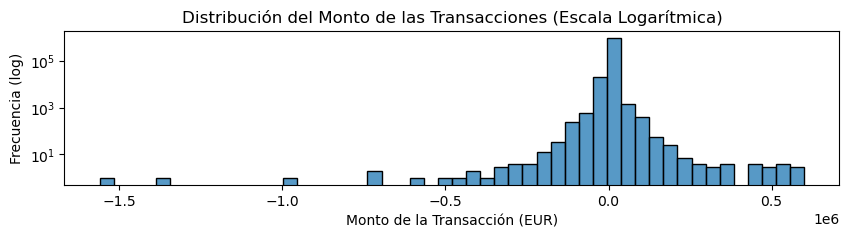

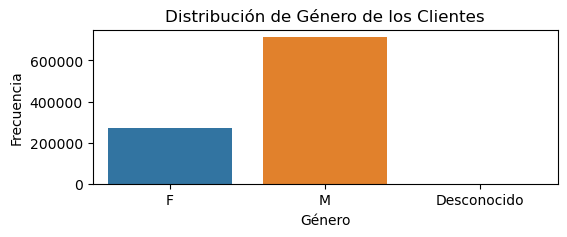

In [184]:
# Histograma con escala logarítmica
plt.figure(figsize=(10, 2))
sns.histplot(transactions_c['TransactionAmount (eur)'], bins=50)
plt.yscale('log')
plt.title('Distribución del Monto de las Transacciones (Escala Logarítmica)')
plt.xlabel('Monto de la Transacción (EUR)')
plt.ylabel('Frecuencia (log)')
plt.show()

# Análisis de CustomerGender
plt.figure(figsize=(6, 2))
sns.countplot(data=transactions_c, x='CustomerGender')
plt.title('Distribución de Género de los Clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* <strong>Distribución del Monto de las Transacciones (Escala Logarítmica):</strong> La mayoría de las transacciones tienen montos pequeños con algunos valores extremos. La transformación logarítmica ayuda a estabilizar la varianza y normalizar la distribución, lo que puede mejorar el rendimiento de los algoritmos de ML que asumen una distribución normal de los datos.

* <strong>Distribución de Género de los Clientes:</strong> La predominancia de clientes masculinos indica una posible variable predictiva demográfica. Esta distribución de género puede ser útil para segmentar los datos y entender mejor los patrones de comportamiento de diferentes grupos de clientes.

**data_BOC_creditRisk.csv**

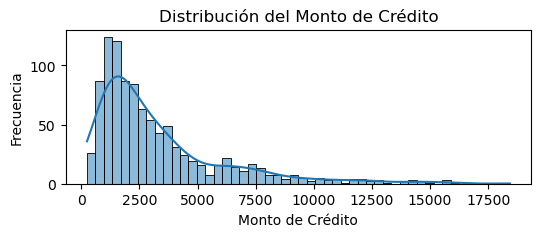

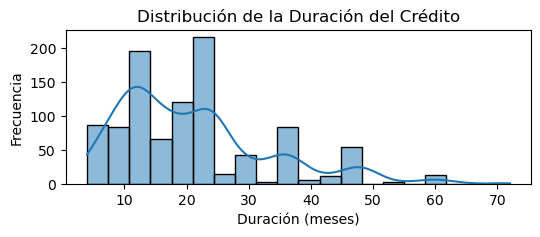

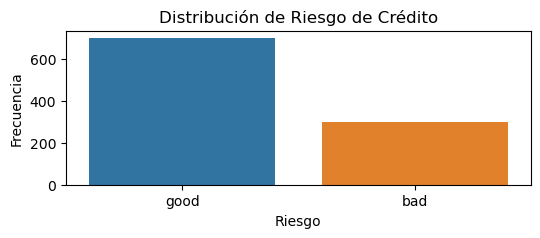

In [185]:
# Análisis de la cantidad de crédito y la duración
plt.figure(figsize=(6, 2))
sns.histplot(credit_risk['Credit amount'], bins=50, kde=True)
plt.title('Distribución del Monto de Crédito')
plt.xlabel('Monto de Crédito')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6, 2))
sns.histplot(credit_risk['Duration'], bins=20, kde=True)
plt.title('Distribución de la Duración del Crédito')
plt.xlabel('Duración (meses)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución del riesgo
plt.figure(figsize=(6, 2))
sns.countplot(data=credit_risk, x='Risk')
plt.title('Distribución de Riesgo de Crédito')
plt.xlabel('Riesgo')
plt.ylabel('Frecuencia')
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* <strong>Distribución del Monto de Crédito</strong>: La mayoría de los créditos tienen montos pequeños, lo cual puede influir en la predicción del riesgo crediticio. La distribución sesgada hacia montos más bajos sugiere que el modelo debe estar bien ajustado para manejar esta variabilidad y detectar patrones tanto en créditos pequeños como en los pocos créditos de montos altos.
  
* <strong>Distribución de la Duración del Crédito</strong>: La concentración de créditos en duraciones cortas (10-24 meses) sugiere que el modelo debe ser capaz de distinguir entre diferentes comportamientos de pago a corto plazo. Las duraciones más largas, aunque menos frecuentes, pueden proporcionar información valiosa sobre los clientes con créditos de mayor plazo.
  
* <strong>Distribución de Riesgo de Crédito</strong>: La mayoría de los clientes tienen un buen riesgo de crédito, indicando un desequilibrio de clases en el dataset. Para construir un modelo robusto, se necesitarán técnicas como el sobremuestreo (SMOTE) o el submuestreo para manejar este desequilibrio y asegurar que el modelo no sea sesgado hacia la clase mayoritaria (buen riesgo).

**data_BOC_fraudDetection.csv**

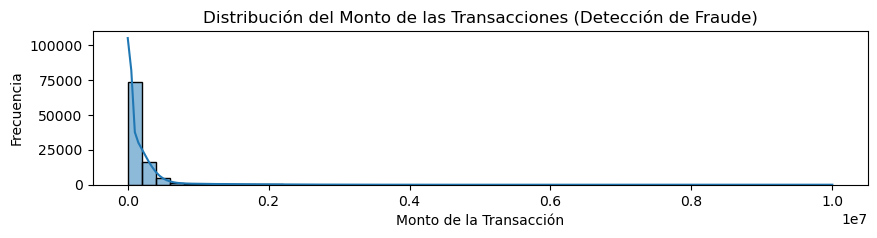

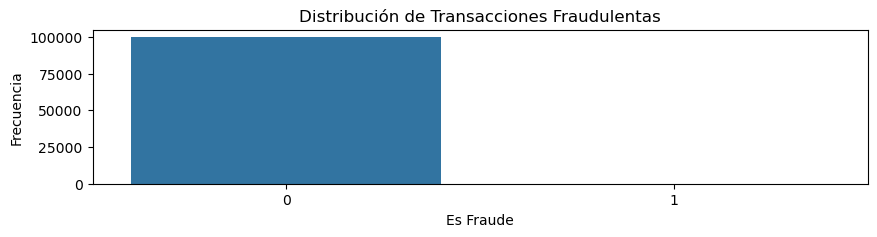

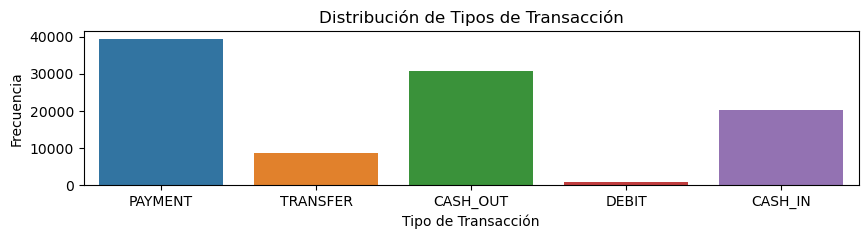

In [186]:
# Distribución de los montos de las transacciones
plt.figure(figsize=(10, 2))
sns.histplot(fraud_detection['amount'], bins=50, kde=True)
plt.title('Distribución del Monto de las Transacciones (Detección de Fraude)')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de las transacciones fraudulentas
plt.figure(figsize=(10, 2))
sns.countplot(data=fraud_detection, x='isFraud')
plt.title('Distribución de Transacciones Fraudulentas')
plt.xlabel('Es Fraude')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de la distribución de tipo de transacción
plt.figure(figsize=(10, 2))
sns.countplot(data=fraud_detection, x='type')
plt.title('Distribución de Tipos de Transacción')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Frecuencia')
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

* <strong>Distribución del Monto de las Transacciones:</strong> La mayoría de las transacciones tienen montos pequeños, pero las transacciones fraudulentas pueden tener montos significativamente diferentes. La identificación de transacciones anómalas en diferentes rangos de montos será crucial para un modelo efectivo de detección de fraude.

* <strong>Distribución de Transacciones Fraudulentas:</strong> La baja incidencia de transacciones fraudulentas representa un gran desequilibrio de clases. Técnicas de re-muestreo, como SMOTE, y el uso de métricas de evaluación como el F1-score, en lugar de la precisión, serán cruciales para evaluar el rendimiento del modelo.

* <strong>Distribución de Tipos de Transacción:</strong> La alta frecuencia de ciertos tipos de transacción (como "PAYMENT" y "CASH_OUT") indica que el modelo debe ser capaz de identificar patrones de fraude específicos para estos tipos de transacción. La variabilidad en los tipos de transacciones también puede ayudar a mejorar la precisión del modelo al capturar características específicas de cada tipo.